In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hope.csv to hope.csv


In [ ]:
import io
import pandas as pd
import numpy as np

df = pd.read_csv(io.BytesIO(uploaded['hope.csv']))

In [ ]:
df.drop(['Index_', 'event_unique_id', 'occurrencedate','premisetype',
       'ucr_code', 'ucr_ext', 'offence','occurrencemonth',
       'occurrenceday','MCI', 'Division','Long', 'Lat'], axis = 1,inplace=True)

In [ ]:
new_df_1=( df.groupby(['occurrenceyear','occurrencedayofyear','occurrencedayofweek'],as_index=False).agg(list).reindex(columns=df.columns) )
new_df_1.tail()

,occurrenceyear,occurrencedayofyear,occurrencedayofweek,occurrencehour,Hood_ID
2539,2019,361,Friday,"[2, 2, 17, 11, 11, 2, 2, 22, 20, 6, 12, 3, 3, ...","[77, 77, 42, 103, 16, 113, 5, 81, 33, 83, 27, ..."
2540,2019,362,Saturday,"[11, 18, 21, 23, 19, 4, 0, 18, 20, 0, 4, 14, 1...","[39, 82, 27, 26, 77, 84, 34, 128, 93, 55, 26, ..."
2541,2019,363,Sunday,"[10, 21, 3, 9, 9, 3, 13, 23, 0, 5, 4, 15, 19, ...","[58, 138, 76, 33, 33, 65, 1, 71, 94, 1, 111, 3..."
2542,2019,364,Monday,"[19, 1, 13, 5, 0, 0, 19, 11, 4, 14, 17, 15, 15...","[21, 75, 2, 130, 82, 32, 109, 83, 132, 94, 5, ..."
2543,2019,365,Tuesday,"[9, 17, 0, 17, 11, 20, 20, 9, 23, 19, 2, 13, 2...","[14, 138, 42, 93, 85, 136, 136, 92, 82, 85, 93..."


In [ ]:
d = {}
d['Sunday    '] = 1
d['Monday    '] = 2
d['Tuesday   '] = 3
d['Wednesday '] = 4
d['Thursday  '] = 5
d['Friday    '] = 6
d['Saturday  '] = 7

for i in range(1,141):
  new_df_1[str(i)] = 0
for i in range(2544):
  new_df_1.iloc[i,2] = d[new_df_1.iloc[i,2]]
  x = new_df_1.iloc[i,4]
  for j in x:
    new_df_1.iloc[i,4+j] = 1 
new_df_1.head(10)

,occurrenceyear,occurrencedayofyear,occurrencedayofweek,occurrencehour,Hood_ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,...,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140
0,2000,1,7,"[10, 0, 0, 0, 0, 23, 12, 0, 9]","[2, 23, 131, 132, 60, 132, 72, 123, 60]",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
1,2000,32,3,[10],[107],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2000,214,3,[12],[95],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2000,275,1,"[0, 0]","[84, 84]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2000,327,4,[8],[55],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2001,1,2,"[0, 0, 2, 0, 0]","[61, 131, 126, 119, 40]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6,2001,91,1,"[18, 18]","[14, 14]",0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,2001,208,6,"[12, 12]","[136, 136]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8,2001,283,4,[19],[1],1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,2001,296,3,[21],[82],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
new_df_1 = new_df_1.sort_values(['occurrenceyear','occurrencedayofyear'])
new_df_1.tail()

,occurrenceyear,occurrencedayofyear,occurrencedayofweek,occurrencehour,Hood_ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,...,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140
2539,2019,361,6,"[2, 2, 17, 11, 11, 2, 2, 22, 20, 6, 12, 3, 3, ...","[77, 77, 42, 103, 16, 113, 5, 81, 33, 83, 27, ...",1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,1,0,0,1,1,0,0,0,1,1,1,1,0,...,0,1,1,1,0,1,0,1,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,1,0,0,1,0,1,1,0,0,0,0,1,0,1
2540,2019,362,7,"[11, 18, 21, 23, 19, 4, 0, 18, 20, 0, 4, 14, 1...","[39, 82, 27, 26, 77, 84, 34, 128, 93, 55, 26, ...",1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,1,1,1,0,0,1,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,1,1,1,0,0,1,1,0,1,0,1,0,0,0,0
2541,2019,363,1,"[10, 21, 3, 9, 9, 3, 13, 23, 0, 5, 4, 15, 19, ...","[58, 138, 76, 33, 33, 65, 1, 71, 94, 1, 111, 3...",1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,1,1,0,1,0,0,...,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0,1,1,1,1,0,1
2542,2019,364,2,"[19, 1, 13, 5, 0, 0, 19, 11, 4, 14, 17, 15, 15...","[21, 75, 2, 130, 82, 32, 109, 83, 132, 94, 5, ...",0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,1,0,1,0,1,0,0,0,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,1,0
2543,2019,365,3,"[9, 17, 0, 17, 11, 20, 20, 9, 23, 19, 2, 13, 2...","[14, 138, 42, 93, 85, 136, 136, 92, 82, 85, 93...",1,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,1,0,0


In [ ]:
hope_df = new_df_1.loc[718:,:]

In [ ]:
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import to_categorical 
from sklearn.utils import class_weight

xl = ['occurrenceyear' ,'occurrencedayofyear' ,'occurrencedayofweek']
tc = []
for i in range(1,141):
  tc.append(str(i))
x_1 = hope_df[xl].values
y_1 = hope_df[tc].values

#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x_1)
#y_scaled = min_max_scaler.fit_transform(y_1)
#x = pd.DataFrame(x_scaled).values
#y = pd.DataFrame(y_scaled).values

x_train, x_test, y_train, y_test = train_test_split(x_1, y_1, test_size=0.30, random_state=40)
#x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1 ))
#x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

print(x_train.shape); print(x_test.shape)
print(y_train.shape);print(y_test.shape)


(1278, 3)
(548, 3)
(1278, 140)
(548, 140)


In [ ]:
model = Sequential()
model.add(Dense(100,activation='relu',input_dim=3))
model.add(Dense(140,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model.fit(x_train, y_train, epochs=100,validation_split=0.2, verbose=2)


Train on 1022 samples, validate on 256 samples
Epoch 1/100
 - 0s - loss: 0.5897 - val_loss: 0.5918
Epoch 2/100
 - 0s - loss: 0.5896 - val_loss: 0.5918
Epoch 3/100
 - 0s - loss: 0.5896 - val_loss: 0.5916
Epoch 4/100
 - 0s - loss: 0.5896 - val_loss: 0.5915
Epoch 5/100
 - 0s - loss: 0.5898 - val_loss: 0.5922
Epoch 6/100
 - 0s - loss: 0.5898 - val_loss: 0.5914
Epoch 7/100
 - 0s - loss: 0.5897 - val_loss: 0.5915
Epoch 8/100
 - 0s - loss: 0.5895 - val_loss: 0.5916
Epoch 9/100
 - 0s - loss: 0.5896 - val_loss: 0.5915
Epoch 10/100
 - 0s - loss: 0.5899 - val_loss: 0.5914
Epoch 11/100
 - 0s - loss: 0.5896 - val_loss: 0.5914
Epoch 12/100
 - 0s - loss: 0.5896 - val_loss: 0.5914
Epoch 13/100
 - 0s - loss: 0.5897 - val_loss: 0.5921
Epoch 14/100
 - 0s - loss: 0.5898 - val_loss: 0.5916
Epoch 15/100
 - 0s - loss: 0.5900 - val_loss: 0.5926
Epoch 16/100
 - 0s - loss: 0.5896 - val_loss: 0.5917
Epoch 17/100
 - 0s - loss: 0.5897 - val_loss: 0.5918
Epoch 18/100
 - 0s - loss: 0.5897 - val_loss: 0.5916
Epoch 19

In [ ]:
pred_test= model.predict(x_test)
for i in range(140):
  print(pred_test[10][i],y_test[10][i])

0.88241446 1
0.68641245 1
0.20809384 1
0.32621133 0
0.22434373 0
0.35465464 0
0.35148337 0
0.19626704 0
0.18032798 0
0.21053582 0
0.22082797 0
0.09549639 0
0.14645766 0
0.73874164 1
0.08318475 0
0.341353 0
0.6397243 0
0.3304731 0
0.24554704 0
0.13387805 0
0.5424305 1
0.4051812 0
0.29984856 1
0.7045795 1
0.6242265 1
0.8088218 1
0.75834656 0
0.15227462 0
0.1860953 0
0.35887983 1
0.5994929 1
0.2818416 0
0.34295058 1
0.270612 0
0.32158437 0
0.4837512 0
0.24448825 0
0.2746732 0
0.2738621 0
0.2610156 0
0.11682327 1
0.30156007 1
0.34879228 0
0.28961322 0
0.4669566 0
0.15507655 0
0.35601142 1
0.19623643 0
0.24519852 0
0.22789681 0
0.43274924 0
0.25744185 0
0.26493484 0
0.5866352 0
0.27002662 0
0.27381495 0
0.22375597 0
0.16921534 1
0.20627555 0
0.17565233 0
0.45375222 0
0.4862747 1
0.3565935 1
0.18287559 0
0.25582188 1
0.217685 0
0.34757924 0
0.30835763 0
0.22799562 0
0.76434153 1
0.36863765 1
0.34310004 0
0.86560845 1
0.41569042 0
0.8842937 1
0.96151006 1
0.98673797 1
0.86257666 1
0.6162 0
0.

In [ ]:
model.save('hood_3')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
model.save('/content/gdrive/My Drive/hood_3')

In [ ]:
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import to_categorical 
from sklearn.utils import class_weight

xl = ['occurrenceyear' ,'occurrencedayofyear' ]
tc = []
for i in range(1,141):
  tc.append(str(i))
x_1 = hope_df[xl].values
y_1 = hope_df[tc].values

#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x_1)
#y_scaled = min_max_scaler.fit_transform(y_1)
#x = pd.DataFrame(x_scaled).values
#y = pd.DataFrame(y_scaled).values

x_train, x_test, y_train, y_test = train_test_split(x_1, y_1, test_size=0.30, random_state=40)
#x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1 ))
#x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

print(x_train.shape); print(x_test.shape)
print(y_train.shape);print(y_test.shape)

(1278, 2)
(548, 2)
(1278, 140)
(548, 140)


In [ ]:
model = Sequential()
model.add(Dense(100,activation='relu',input_dim=2))
model.add(Dense(140,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model.fit(x_train, y_train, epochs=100,validation_split=0.2, verbose=2)


Train on 1022 samples, validate on 256 samples
Epoch 1/100
 - 0s - loss: 0.5893 - val_loss: 0.5916
Epoch 2/100
 - 0s - loss: 0.5893 - val_loss: 0.5919
Epoch 3/100
 - 0s - loss: 0.5893 - val_loss: 0.5928
Epoch 4/100
 - 0s - loss: 0.5893 - val_loss: 0.5916
Epoch 5/100
 - 0s - loss: 0.5892 - val_loss: 0.5915
Epoch 6/100
 - 0s - loss: 0.5891 - val_loss: 0.5916
Epoch 7/100
 - 0s - loss: 0.5892 - val_loss: 0.5916
Epoch 8/100
 - 0s - loss: 0.5891 - val_loss: 0.5916
Epoch 9/100
 - 0s - loss: 0.5892 - val_loss: 0.5919
Epoch 10/100
 - 0s - loss: 0.5893 - val_loss: 0.5917
Epoch 11/100
 - 0s - loss: 0.5893 - val_loss: 0.5915
Epoch 12/100
 - 0s - loss: 0.5893 - val_loss: 0.5928
Epoch 13/100
 - 0s - loss: 0.5897 - val_loss: 0.5920
Epoch 14/100
 - 0s - loss: 0.5893 - val_loss: 0.5921
Epoch 15/100
 - 0s - loss: 0.5892 - val_loss: 0.5916
Epoch 16/100
 - 0s - loss: 0.5893 - val_loss: 0.5917
Epoch 17/100
 - 0s - loss: 0.5893 - val_loss: 0.5916
Epoch 18/100
 - 0s - loss: 0.5892 - val_loss: 0.5916
Epoch 19

In [ ]:
pred_test= model.predict(x_test)
for i in range(140):
  print(pred_test[10][i],y_test[10][i])

0.84318525 1
0.59384793 1
0.22936907 1
0.3003041 0
0.20258307 0
0.3616466 0
0.36642635 0
0.21270601 0
0.30573192 0
0.19218451 0
0.1829298 0
0.1244714 0
0.16064925 0
0.6854581 1
0.20122012 0
0.4161987 0
0.65560675 0
0.320444 0
0.24953143 0
0.21471272 0
0.50732166 1
0.49153966 0
0.2569979 1
0.6597159 1
0.74485725 1
0.8643749 1
0.86265177 0
0.17077015 0
0.101025425 0
0.41429612 1
0.60305107 1
0.4215013 0
0.34808835 1
0.21506366 0
0.29627582 0
0.5314969 0
0.34095532 0
0.3207769 0
0.38538212 0
0.48613244 0
0.24397783 1
0.3527084 1
0.35558775 0
0.39200917 0
0.54389524 0
0.14276156 0
0.38381955 1
0.23964441 0
0.2248712 0
0.3701484 0
0.58981687 0
0.31660455 0
0.25804332 0
0.49174032 0
0.3014899 0
0.21071076 0
0.26205596 0
0.16841617 1
0.24878345 0
0.14335378 0
0.36728817 0
0.45025986 1
0.35638854 1
0.19508472 0
0.29769507 1
0.29603696 0
0.2906879 0
0.31444964 0
0.18045962 0
0.5759443 1
0.36603186 1
0.34535626 0
0.8566648 1
0.48724177 0
0.8610107 1
0.9455943 1
0.94581294 1
0.7310939 1
0.5229986

In [ ]:
model.save('/content/gdrive/My Drive/hood_2')

In [ ]:
hope_df.to_csv('/content/gdrive/My Drive/hope_data/hood_2_3.csv')

In [ ]:
for i in range(2544):
  for j in range(1,141):
    if new_df_1.iloc[i,j]==0:
      new_df_1.iloc[i,j] = 1
new_df_1.tail()

,occurrenceyear,occurrencedayofyear,occurrencedayofweek,occurrencehour,Hood_ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,...,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140
2539,2019,361,6,"[2, 2, 17, 11, 11, 2, 2, 22, 20, 6, 12, 3, 3, ...","[77, 77, 42, 103, 16, 113, 5, 81, 33, 83, 27, ...",4,0,1,0,2,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,2,2,0,0,1,2,0,0,0,1,1,1,1,0,...,0,1,1,1,0,1,0,1,1,2,0,0,1,0,0,0,2,0,4,0,1,0,0,0,1,1,1,0,0,1,0,1,1,0,0,0,0,1,0,1
2540,2019,362,7,"[11, 18, 21, 23, 19, 4, 0, 18, 20, 0, 4, 14, 1...","[39, 82, 27, 26, 77, 84, 34, 128, 93, 55, 26, ...",4,1,0,0,0,0,1,2,0,0,0,1,0,1,0,0,1,1,2,0,1,2,0,0,1,6,3,0,0,2,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0,0,2,0,1,2,0,1,0,0,0,0,1,0,3,0,3,1,2,0,0,2,3,0,2,0,5,0,0,0,0
2541,2019,363,1,"[10, 21, 3, 9, 9, 3, 13, 23, 0, 5, 4, 15, 19, ...","[58, 138, 76, 33, 33, 65, 1, 71, 94, 1, 111, 3...",2,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,2,1,2,0,0,0,1,3,0,2,0,0,...,0,2,0,1,0,0,1,0,0,0,1,2,0,0,1,0,0,0,2,1,0,0,0,2,0,0,0,0,1,1,0,3,0,0,1,1,3,1,0,1
2542,2019,364,2,"[19, 1, 13, 5, 0, 0, 19, 11, 4, 14, 17, 15, 15...","[21, 75, 2, 130, 82, 32, 109, 83, 132, 94, 5, ...",0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,4,1,1,0,2,0,1,0,0,0,2,0,0,1,1,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0,2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,2,2,2,0,0,1,0,0,0,1,0
2543,2019,365,3,"[9, 17, 0, 17, 11, 20, 20, 9, 23, 19, 2, 13, 2...","[14, 138, 42, 93, 85, 136, 136, 92, 82, 85, 93...",1,1,0,0,0,0,0,0,0,1,0,0,1,2,0,0,3,0,0,0,0,0,0,0,6,1,2,1,0,1,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,3,1,0,0,0,2,0,1,0,0


In [ ]:
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import to_categorical 
from sklearn.utils import class_weight

xl = ['occurrenceyear' ,'occurrencedayofyear' ,'occurrencedayofweek']
tc = []
for i in range(1,141):
  tc.append(str(i))
x_1 = new_df_1[xl].values
y_1 = new_df_1[tc].values

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x_1)
y_scaled = min_max_scaler.fit_transform(y_1)
x = pd.DataFrame(x_scaled).values
y = pd.DataFrame(y_scaled).values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=40)
#x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1 ))
#x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

print(x_train.shape); print(x_test.shape)
print(y_train.shape);print(y_test.shape)

class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(np.ravel(y_train,order='C')),
                                                 np.ravel(y_train,order='C'))

(1780, 3)
(764, 3)
(1780, 140)
(764, 140)


In [ ]:
model = Sequential()
model.add(Dense(10,input_dim=3))
model.add(Dense(140))
model.compile(loss='mean_squared_error', optimizer='adam')


In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=1,validation_split=0.2, verbose=2,class_weight=class_weights)

Train on 1424 samples, validate on 356 samples
Epoch 1/5
 - 4s - loss: 0.0132 - val_loss: 0.0130
Epoch 2/5
 - 4s - loss: 0.0124 - val_loss: 0.0129
Epoch 3/5
 - 4s - loss: 0.0123 - val_loss: 0.0129
Epoch 4/5
 - 4s - loss: 0.0122 - val_loss: 0.0127
Epoch 5/5
 - 4s - loss: 0.0122 - val_loss: 0.0128


In [ ]:
pred_train= model.predict(x_train)
scores= model.evaluate(x_train, y_train, verbose=0)
#print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(x_test)
scores2 = model.evaluate(x_test, y_test, verbose=0)
#print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    

print(y_test[0])

[0.0952381  0.         0.         0.         0.16666667 0.16666667
 0.125      0.         0.         0.         0.         0.
 0.         0.46153846 0.         0.         0.08333333 0.14285714
 0.         0.         0.14285714 0.         0.         0.
 0.36363636 0.11111111 0.45454545 0.         0.2        0.28571429
 0.2        0.33333333 0.         0.16666667 0.         0.22222222
 0.         0.         0.14285714 0.         0.         0.05882353
 0.         0.14285714 0.         0.         0.14285714 0.
 0.         0.         0.         0.16666667 0.         0.
 0.42857143 0.         0.         0.         0.         0.
 0.         0.33333333 0.         0.         0.         0.
 0.         0.         0.         0.25       0.         0.
 0.27272727 0.22222222 0.05882353 0.27272727 0.04545455 0.33333333
 0.         0.         0.         0.11111111 0.         0.
 0.18181818 0.         0.         0.14285714 0.         0.42857143
 0.5        0.25       0.         0.         0.         0.


<BarContainer object of 140 artists>

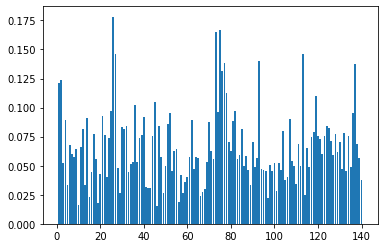

In [ ]:
import matplotlib.pyplot as plt

plt.bar([i for i in range(1,141)], pred_test[0])

In [ ]:

for arr in pred_test:
  for i in range(140):
    if arr[i]<0.08:
      arr[i] = 0
    elif arr[i]>=0.08:
      arr[i] = 1
for arr in y_test:
  for i in range(140):
    if arr[i]<0.2:
      arr[i] = 0
    elif arr[i]>=0.2:
      arr[i] = 1
print(pred_test[0])
print(y_test[0])
act = {0:0,1:0}
pre = {0:0,1:0}
for i in range(len(pred_test)):
  for j in range(140):
    if pred_test[i][j]==y_test[i][j]:
      pre[int(pred_test[i][j])] += 1
    act[int(y_test[i][j])] += 1

print(pre)
print(act)
print(pre[0]/act[0],pre[1]/act[1])

[1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
{0: 67400, 1: 6516}
{0: 93565, 1: 13395}
0.720354833538182 0.4864501679731243


<BarContainer object of 140 artists>

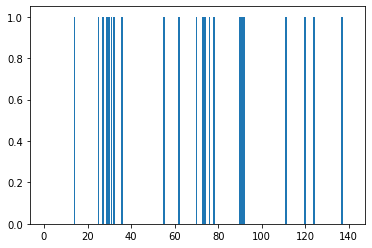

In [ ]:
plt.bar([i for i in range(1,141)], y_test[0])

<BarContainer object of 140 artists>

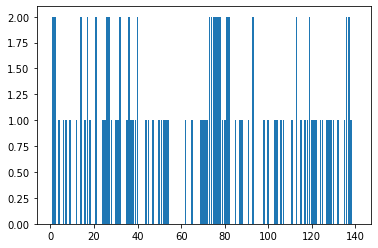

In [ ]:
plt.bar([i for i in range(1,141)],pred_test[0])

last best = 94,129,98,90

model.add(Dense(100,input_dim=3))
model.add(Dense(140)
loss = 100

model.add(Dense(50,input_dim=3))
model.add(Dense(140))
loss = 95

model.add(Dense(10,input_dim=3))
model.add(Dense(140))
loss = 82



In [ ]:
new_df_2=( df.groupby(['occurrenceyear','occurrencedayofyear','occurrencedayofweek','Hood_ID'],as_index=False).agg(list).reindex(columns=df.columns) )
new_df_2.tail()

,occurrenceyear,occurrencedayofyear,occurrencedayofweek,occurrencehour,Hood_ID
118431,2019,365,Tuesday,[7],129
118432,2019,365,Tuesday,"[3, 4, 16]",131
118433,2019,365,Tuesday,[18],132
118434,2019,365,Tuesday,"[20, 20]",136
118435,2019,365,Tuesday,[17],138


In [ ]:
d = {}
d['Sunday    '] = 1
d['Monday    '] = 2
d['Tuesday   '] = 3
d['Wednesday '] = 4
d['Thursday  '] = 5
d['Friday    '] = 6
d['Saturday  '] = 7

for i in range(24):
  new_df_2[str(i)] = 0
for i in range(118435):
  new_df_2.iloc[i,2] = d[new_df_2.iloc[i,2]]
  x = new_df_2.iloc[i,3]
  for j in x:
    new_df_2.iloc[i,5+j] = 1 
new_df_2.head(10)

,occurrenceyear,occurrencedayofyear,occurrencedayofweek,occurrencehour,Hood_ID,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,2000,1,7,[10],2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2000,1,7,[0],23,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2000,1,7,"[0, 9]",60,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2000,1,7,[12],72,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2000,1,7,[0],123,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2000,1,7,[0],131,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2000,1,7,"[0, 23]",132,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,2000,32,3,[10],107,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8,2000,214,3,[12],95,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9,2000,275,1,"[0, 0]",84,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
new_df_2 = new_df_2.sort_values(['occurrenceyear','occurrencedayofyear'])
new_df_2.tail()

,occurrenceyear,occurrencedayofyear,occurrencedayofweek,occurrencehour,Hood_ID,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
118431,2019,365,3,[7],129,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
118432,2019,365,3,"[3, 4, 16]",131,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
118433,2019,365,3,[18],132,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
118434,2019,365,3,"[20, 20]",136,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
118435,2019,365,Tuesday,[17],138,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


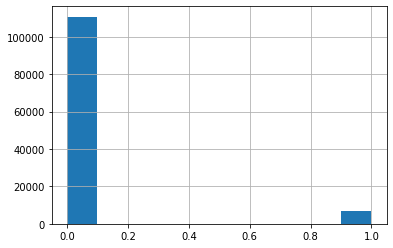

In [ ]:
new_df_2.loc[718:,'1'].hist()

In [ ]:
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import to_categorical 
from sklearn.utils import class_weight

xl = ['occurrenceyear' ,'occurrencedayofyear', 'Hood_ID']
tc = []
for i in range(24):
  tc.append(str(i))
x_1 = new_df_2[xl].values
y_1 = new_df_2[tc].values

#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x_1)
#y_scaled = min_max_scaler.fit_transform(y_1)
#x = pd.DataFrame(x_scaled).values
#y = pd.DataFrame(y_scaled).values

x_train, x_test, y_train, y_test = train_test_split(x_1, y_1, test_size=0.30, random_state=40)
#x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1 ))
#x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

print(x_train.shape); print(x_test.shape)
print(y_train.shape);print(y_test.shape)

(82905, 3)
(35531, 3)
(82905, 24)
(35531, 24)


In [ ]:
model = Sequential()
model.add(Dense(10,activation='relu',input_dim=3))
model.add(Dense(24,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model.fit(x_train, y_train, epochs=20,validation_split=0.2, verbose=2)


Train on 66324 samples, validate on 16581 samples
Epoch 1/20
 - 5s - loss: 6.1870 - val_loss: 0.2506
Epoch 2/20
 - 5s - loss: 0.2463 - val_loss: 0.2427
Epoch 3/20
 - 5s - loss: 0.2473 - val_loss: 0.2454
Epoch 4/20
 - 5s - loss: 0.2478 - val_loss: 0.2499
Epoch 5/20
 - 5s - loss: 0.2468 - val_loss: 0.2533
Epoch 6/20
 - 5s - loss: 0.2460 - val_loss: 0.2498
Epoch 7/20
 - 5s - loss: 0.2462 - val_loss: 0.2426
Epoch 8/20
 - 5s - loss: 0.2453 - val_loss: 0.2497
Epoch 9/20
 - 5s - loss: 0.2447 - val_loss: 0.2529
Epoch 10/20
 - 5s - loss: 0.2446 - val_loss: 0.2416
Epoch 11/20
 - 5s - loss: 0.2434 - val_loss: 0.2455
Epoch 12/20
 - 5s - loss: 0.2433 - val_loss: 0.2505
Epoch 13/20
 - 5s - loss: 0.2435 - val_loss: 0.2367
Epoch 14/20
 - 5s - loss: 0.2430 - val_loss: 0.2388
Epoch 15/20
 - 5s - loss: 0.2428 - val_loss: 0.2456
Epoch 16/20
 - 5s - loss: 0.2418 - val_loss: 0.2363
Epoch 17/20
 - 5s - loss: 0.2415 - val_loss: 0.2425
Epoch 18/20
 - 5s - loss: 0.2414 - val_loss: 0.2481
Epoch 19/20
 - 5s - los

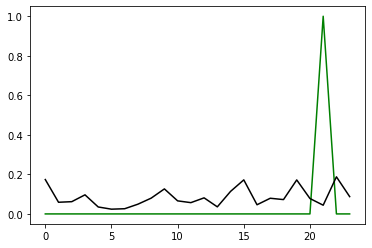

In [ ]:
pred_test= model.predict(x_test)
plt.plot(y_test[0],color='g')
plt.plot(pred_test[0],color='k')